# Importing Libraries

In [1]:
import pyodbc 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pivottablejs import pivot_ui
sns.set()
pd.set_option('display.max_columns', None)
pd.options.display.float_format = "{:.2f}".format

In [2]:
store = pd.read_excel("USA_AHFS_Stores.xlsx",sheet_name='2021')

In [3]:
store.head()

,StoreID,Written,Gross Written,Written Cost,Written GM $,Written GM %,REAC %,Traffic,Tickets,Average Ticket,Close Rate%,SPG,Rest Test,Finance Count,Finance Amount,Finance%,TotalSquareFeet,PSF,EmployeeHours
0,1,2688305.20,3226395.05,1279056.21,1409248.99,0.52,0.17,9932.50,1451.75,1851.77,0.15,270.66,0,863,1961576.17,0.73,38150,70.47,7106.30
1,2,2440597.45,2784632.25,1162037.89,1278559.56,0.52,0.12,7159.00,1389.84,1756.03,0.19,340.91,0,766,1579716.16,0.65,49093,49.71,10856.88
2,3,3747386.42,4312882.78,1691342.40,2056044.02,0.55,0.13,11557.50,1743.65,2149.16,0.15,324.24,0,1140,2881925.85,0.77,42554,88.06,8949.80
3,4,3240443.13,3643001.61,1495137.14,1745305.99,0.54,0.11,7241.00,1505.80,2151.97,0.21,447.51,0,939,2551581.31,0.79,34190,94.78,6572.70
4,6,5457981.49,6029094.03,2549215.21,2908766.28,0.53,0.09,13554.50,2729.62,1999.54,0.20,402.67,0,1427,3590081.34,0.66,37983,143.70,11882.58


In [4]:
# Stripping out spaces from ends of names, and replacing internal spaces with "_"
#print("\nStripping spaces from ends of column names; replacing internal spaces with '_'\n")
store.columns = [col.strip().replace(' ', '_').lower() for col in store.columns]
store.columns = [col.strip().replace('-', '_').lower() for col in store.columns]
store.columns = [col.strip().replace('/', '_').lower() for col in store.columns]

In [5]:
store.head()

,storeid,written,gross_written,written_cost,written_gm_$,written_gm_%,reac_%,traffic,tickets,average_ticket,close_rate%,spg,rest_test,finance_count,finance_amount,finance%,totalsquarefeet,psf,employeehours
0,1,2688305.20,3226395.05,1279056.21,1409248.99,0.52,0.17,9932.50,1451.75,1851.77,0.15,270.66,0,863,1961576.17,0.73,38150,70.47,7106.30
1,2,2440597.45,2784632.25,1162037.89,1278559.56,0.52,0.12,7159.00,1389.84,1756.03,0.19,340.91,0,766,1579716.16,0.65,49093,49.71,10856.88
2,3,3747386.42,4312882.78,1691342.40,2056044.02,0.55,0.13,11557.50,1743.65,2149.16,0.15,324.24,0,1140,2881925.85,0.77,42554,88.06,8949.80
3,4,3240443.13,3643001.61,1495137.14,1745305.99,0.54,0.11,7241.00,1505.80,2151.97,0.21,447.51,0,939,2551581.31,0.79,34190,94.78,6572.70
4,6,5457981.49,6029094.03,2549215.21,2908766.28,0.53,0.09,13554.50,2729.62,1999.54,0.20,402.67,0,1427,3590081.34,0.66,37983,143.70,11882.58


In [6]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   storeid          85 non-null     int64  
 1   written          85 non-null     float64
 2   gross_written    85 non-null     float64
 3   written_cost     85 non-null     float64
 4   written_gm_$     85 non-null     float64
 5   written_gm_%     85 non-null     float64
 6   reac_%           85 non-null     float64
 7   traffic          85 non-null     float64
 8   tickets          85 non-null     float64
 9   average_ticket   85 non-null     float64
 10  close_rate%      85 non-null     float64
 11  spg              85 non-null     float64
 12  rest_test        85 non-null     int64  
 13  finance_count    85 non-null     int64  
 14  finance_amount   85 non-null     float64
 15  finance%         85 non-null     float64
 16  totalsquarefeet  85 non-null     int64  
 17  psf              8

In [7]:
store.describe().T

,count,mean,std,min,25%,50%,75%,max
storeid,85.00,84.08,99.19,1.00,23.00,48.00,72.00,544.00
written,85.00,2889480.54,1539811.39,222992.93,1715933.24,2688305.20,3638855.92,9523750.87
gross_written,85.00,3336819.93,1760675.81,571251.24,2022780.41,2985988.39,4272828.34,11200177.73
written_cost,85.00,1364654.59,711065.12,125041.29,882424.27,1262483.87,1679322.84,4440251.27
written_gm_$,85.00,1524825.95,832826.13,97951.64,921747.97,1425816.76,1959533.08,5083499.60
written_gm_%,85.00,0.52,0.04,0.18,0.52,0.53,0.53,0.56
reac_%,85.00,0.14,0.08,0.06,0.11,0.13,0.15,0.74
traffic,85.00,9029.74,3599.83,2851.50,6038.00,8509.00,11557.50,19986.00
tickets,85.00,1547.93,708.28,273.98,998.93,1481.82,1889.77,4221.17
average_ticket,85.00,1817.84,269.94,682.44,1685.39,1851.77,1984.07,2375.25


In [8]:
store.shape

(85, 19)

In [9]:
store.isnull().sum().sort_values(ascending = False)

storeid            0
close_rate%        0
psf                0
totalsquarefeet    0
finance%           0
finance_amount     0
finance_count      0
rest_test          0
spg                0
average_ticket     0
written            0
tickets            0
traffic            0
reac_%             0
written_gm_%       0
written_gm_$       0
written_cost       0
gross_written      0
employeehours      0
dtype: int64

In [10]:
pivot_ui(store)

In [11]:
store.drop(['storeid','rest_test'], axis=1, inplace=True)

C:\Users\MOsman\AppData\Roaming\Python\Python38\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


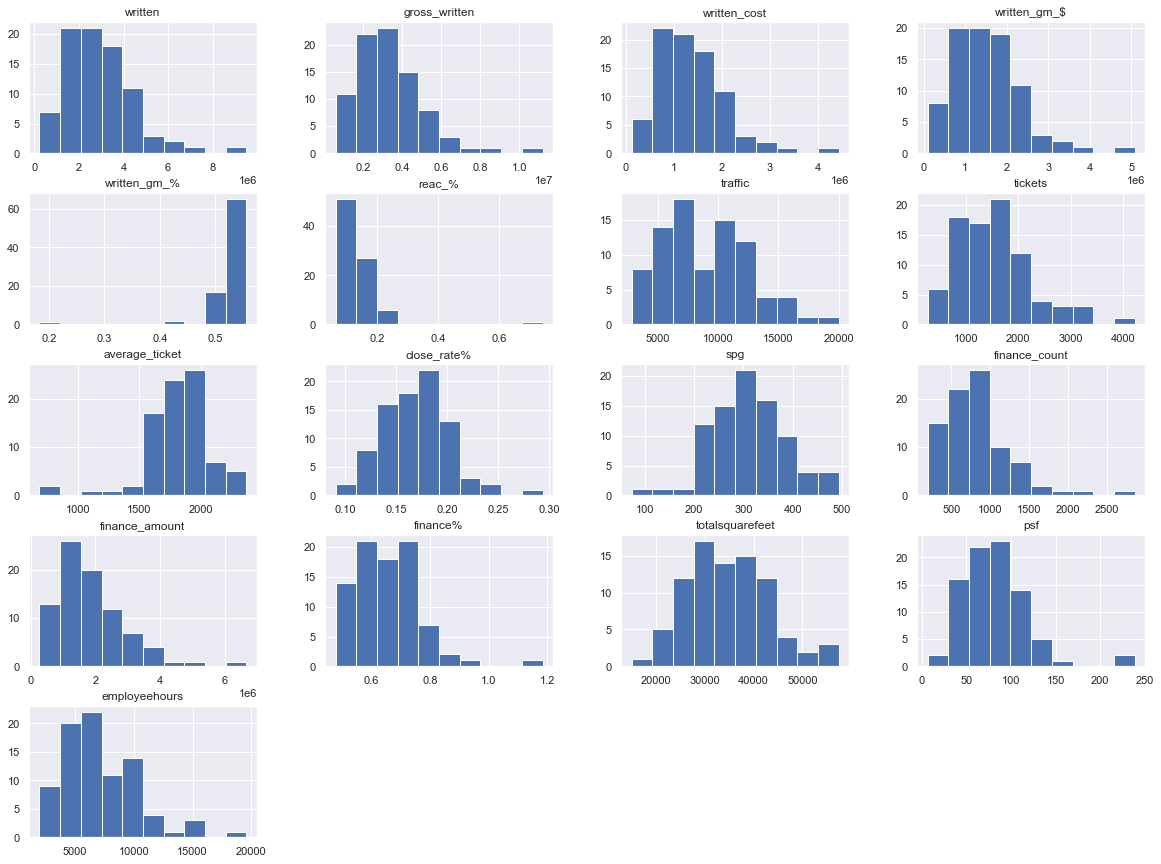

In [12]:
# Visualization of numerical data distribution
store.hist(bins=10, figsize=(20,15))
plt.show()

In [13]:
store.drop(['finance_amount','gross_written','written_cost','written_gm_%','written_gm_$','reac_%'], axis=1, inplace=True)

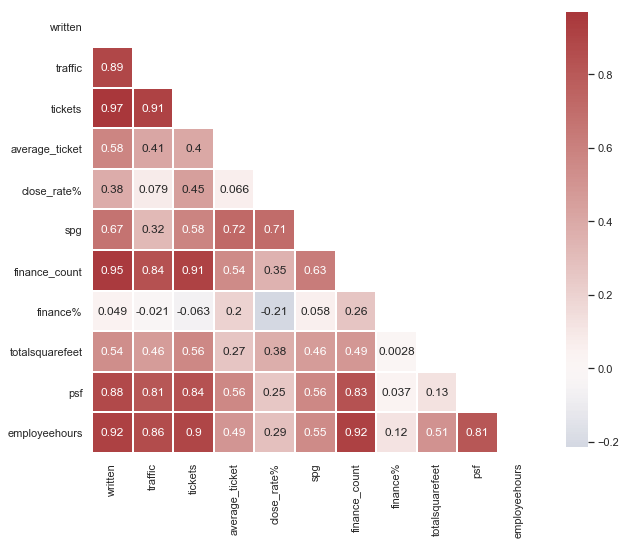

In [14]:
corr = store.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 10))
    ax = sns.heatmap(corr, mask=mask,  cmap = 'vlag', center = 0, square = True, annot = True, linewidths = .1, cbar_kws = {"shrink": .8})